In [1]:
import Policy_Gradient_CV as PG
from scipy.integrate import quad
from scipy import special
import sys 
import os
import torch  
import gym
import numpy as np  
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [2]:

env = gym.make("MountainCarContinuous-v0")
env.seed(1)
torch.manual_seed(1)
np.random.seed(1)
state_dim = 2
action_dim = 1
sampler_parameters_dim = 2
hidden_size = 128
agent = utils.REINFORCE_Agent(state_dim, sampler_parameters_dim, hidden_size)
max_episode_num = 100
max_steps = 10000
gamma = 0.9999



numsteps = []
avg_numsteps = []
all_rewards = []
l = []
final_flag = 1
R = []
R_ = []

for episode in range(max_episode_num):
  process = utils.MDP(env, agent, max_steps, gamma, state_dim, action_dim)
  while final_flag == 1:
    final_flag = process.step()
  final_flag = 1
  cum_rew, mean_rew = process.finalize_trajectory()
  print(cum_rew, mean_rew)
  R.append(cum_rew)
  R_.append(mean_rew)
        
plt.plot(R)
plt.plot(R_)
plt.xlabel('Episode')
plt.show()

NameError: ignored

/content/REINFORCE.py:218: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Q = torch.tensor(q,dtype = torch.float32, requires_grad=True).cuda()
/content/REINFORCE.py:284: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(Q[t-q,:self.action_dim+ self.state_dim].detach().clone(),dtype = torch.float32, requires_grad=True).detach().cpu()
/content/REINFORCE.py:285: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,dtype = torch.float32, requires_grad=True).reshape((1,-1)).cuda()


-3.1712856638609788 -0.003174460123984964


/content/REINFORCE.py:249: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(Q[t-q,:self.action_dim+ self.state_dim].detach().clone(),dtype = torch.float32, requires_grad=True).detach().cpu()
/content/REINFORCE.py:250: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,dtype = torch.float32, requires_grad=True).reshape((1,-1)).cuda()


-3.104209365126068 -0.003107316681807876
-3.007965919293503 -0.0030109768961896926
-3.0521166783621636 -0.003055171850212376
-3.166985575914794 -0.0031701557316464405
-2.9738045299033047 -0.0029767813112145194
-3.009589494686378 -0.0030126020967831614
-3.0287450719599405 -0.0030317768488087493
-3.104006220360413 -0.0031071133336941074
-3.0785669894154903 -0.003081648638053544
-3.073138808292848 -0.003076215023316164
-3.0602602457425307 -0.0030633235693118426
-3.0079247111715897 -0.003010935646818408
-2.974955416826823 -0.0029779333501769997
-3.075434993842517 -0.003078513507349867
-3.026713206846671 -0.0030297429497964674
-3.044189807684159 -0.0030472370447288876
-3.0503225663349363 -0.0030533759422772134
-2.992299724932634 -0.0029952950199525867
-3.021188251424861 -0.0030242124638887495
-2.9457673638480766 -0.0029487160799280044
-2.994269680695343 -0.002997266947642986
-2.972272736201454 -0.0029752479841856395
-2.972913557776134 -0.002975889447223357
-3.0171133304089555 -0.00302013346

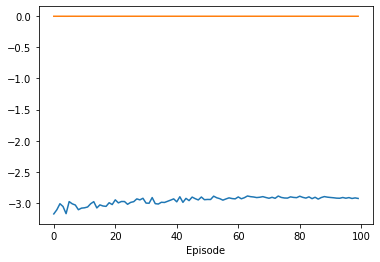

In [5]:


env = gym.make("MountainCarContinuous-v0")
env.seed(1)
torch.manual_seed(1)
np.random.seed(1)
state_dim = 2
action_dim = 1
sampler_parameters_dim = 2
hidden_size = 128
agent = utils.REINFORCE_Agent(state_dim, sampler_parameters_dim, hidden_size)
max_episode_num = 100
max_steps = 10000
gamma = 0.9999
lag = 5
K = 2
burn_in = 2
burn_off = 2
polynomial = utils.herm



numsteps = []
avg_numsteps = []
all_rewards = []
l = []
final_flag = 1
R = []
R_ = []
R_CV = []
R_CV_ = []

for episode in range(max_episode_num):
  if episode%10 == 0:
    status ='work'
    cv = utils.CV(lag, K, burn_in, burn_off, polynomial, max_steps, state_dim, action_dim, status, lr = 0.001)
  else:
    status ='learning'
    cv = utils.CV(lag, K, burn_in, burn_off, polynomial, max_steps, state_dim, action_dim, status, lr = 0.001)
  cv.init_regression(state_dim, action_dim)
  process = utils.MDP(env, agent, max_steps, gamma, state_dim, action_dim, cv)
  while final_flag == 1:
    final_flag = process.step()
  final_flag = 1
  cum_rew, mean_rew  = process.finalize_trajectory()
  print(cum_rew, mean_rew)
  R.append(cum_rew)
  R_.append(mean_rew)
  #R_CV.append(cv)
  #R_CV_.append(cv_)
plt.plot(R)
#plt.plot(R_)
#plt.plot(R_CV)
#plt.plot(R_CV_)
#plt.xlabel('Episode')
plt.show()

In [ ]:
env = gym.make("MountainCarContinuous-v0")
env.seed(1)
torch.manual_seed(1)
np.random.seed(1)
state_dim = 2
action_dim = 1
sampler_parameters_dim = 2
hidden_size = 128
agent = PG.A2C_Agent(state_dim, sampler_parameters_dim, hidden_size)
max_episode_num = 100
max_steps = 10000
gamma = 0.9999



numsteps = []
avg_numsteps = []
all_rewards = []
l = []
final_flag = 1
R = []
R_ = []

for episode in range(max_episode_num):
  process = PG.MDP(env, agent, max_steps, gamma, state_dim, action_dim)
  while final_flag == 1:
    final_flag = process.step()
  final_flag = 1
  cum_rew, mean_rew = process.finalize_trajectory()
  if episode%10 == 0:
    print(cum_rew, mean_rew)
  R.append(cum_rew)
  R_.append(mean_rew)
        
plt.plot(R)
plt.plot(R_)
plt.xlabel('Episode')
plt.show()

/content/Policy_Gradient_CV.py:196: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  utils.clip_grad_norm(self.parameters(), 40)


-45.604101555132026 -0.04564975130643847
-41.2484878535303 -0.04128977763116146
-38.900039370532554 -0.03893897834888144


In [ ]:
if episode%10 == 0:
    status ='work'
    cv = utils.CV(lag, K, burn_in, burn_off, polynomial, max_steps, state_dim, action_dim, status, lr = 0.001)
  else:
    status ='learning'
    cv = utils.CV(lag, K, burn_in, burn_off, polynomial, max_steps, state_dim, action_dim, status, lr = 0.001)

In [ ]:
env = gym.make("MountainCarContinuous-v0")
env.seed(1)
torch.manual_seed(1)
np.random.seed(1)
state_dim = 2
action_dim = 1
sampler_parameters_dim = 2
hidden_size = 128
agent = PG.A2C_Agent(state_dim, sampler_parameters_dim, hidden_size)
max_episode_num = 100
max_steps = 10000
gamma = 0.9999
lag = 5
K = 2
burn_in = 2
burn_off = 2
polynomial = PG.herm


numsteps = []
avg_numsteps = []
all_rewards = []
l = []
final_flag = 1
R = []
R_ = []

for episode in range(max_episode_num):
  if episode%10 == 0:
    status ='work'
    cv = PG.CV(lag, K, burn_in, burn_off, polynomial, max_steps, state_dim, action_dim, status, lr = 0.001)
  else:
    status ='learning'
    cv = PG.CV(lag, K, burn_in, burn_off, polynomial, max_steps, state_dim, action_dim, status, lr = 0.001)
  cv.init_regression(state_dim, action_dim)
  process = PG.MDP(env, agent, max_steps, gamma, state_dim, action_dim, cv)
  while final_flag == 1:
    final_flag = process.step()
  final_flag = 1
  cum_rew, mean_rew = process.finalize_trajectory()
  if episode%10 == 0:
    print(cum_rew, mean_rew)
  R.append(cum_rew)
  R_.append(mean_rew)
        
plt.plot(R)
plt.plot(R_)
plt.xlabel('Episode')
plt.show()

/content/Policy_Gradient_CV.py:333: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Q = torch.tensor(q,dtype = torch.float32, requires_grad=True).cuda()
/content/Policy_Gradient_CV.py:399: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(Q[t-q,:self.action_dim+ self.state_dim].detach().clone(),dtype = torch.float32, requires_grad=True).detach().cpu()
/content/Policy_Gradient_CV.py:400: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,dtype = torch.float32, requires_grad=True).reshape((1,-1)).cuda()
/content/Pol

-45.604101555132026 -0.04564975130643847


/content/Policy_Gradient_CV.py:364: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(Q[t-q,:self.action_dim+ self.state_dim].detach().clone(),dtype = torch.float32, requires_grad=True).detach().cpu()
/content/Policy_Gradient_CV.py:365: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,dtype = torch.float32, requires_grad=True).reshape((1,-1)).cuda()


-45.3889308021498 -0.045434365167317116
